<a href="https://colab.research.google.com/github/pramodsingh0507/Python_Assignment1/blob/main/Evaluation_Metrics_and_Regression_Implementation_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Ques- 1 Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model using Seaborn's "diamonds" dataset.

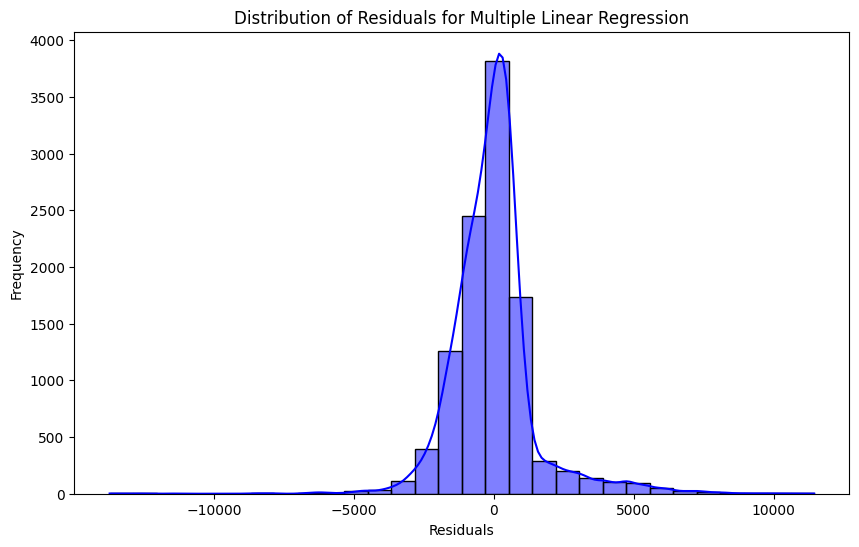

Mean Squared Error: 2333883.1792799835


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')

# Let's select a subset of features for the regression model
# For this example, we'll use 'carat', 'depth', and 'table' as predictors, and 'price' as the target
X = diamonds[['carat', 'depth', 'table']]
y = diamonds['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate residuals (errors)
residuals = y_test - y_pred

# Visualize the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title('Distribution of Residuals for Multiple Linear Regression')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Optionally, print the MSE for reference
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


In [ ]:
# Ques 2) Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) for a linear regression model.?


In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')

# Select a subset of features for the regression model
# We will use 'carat', 'depth', and 'table' as predictors, and 'price' as the target
X = diamonds[['carat', 'depth', 'table']]
y = diamonds['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# Print the results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")



Mean Squared Error (MSE): 2333883.18
Mean Absolute Error (MAE): 994.74
Root Mean Squared Error (RMSE): 1527.71


In [ ]:
# Ques -3 ) Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check
# linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.



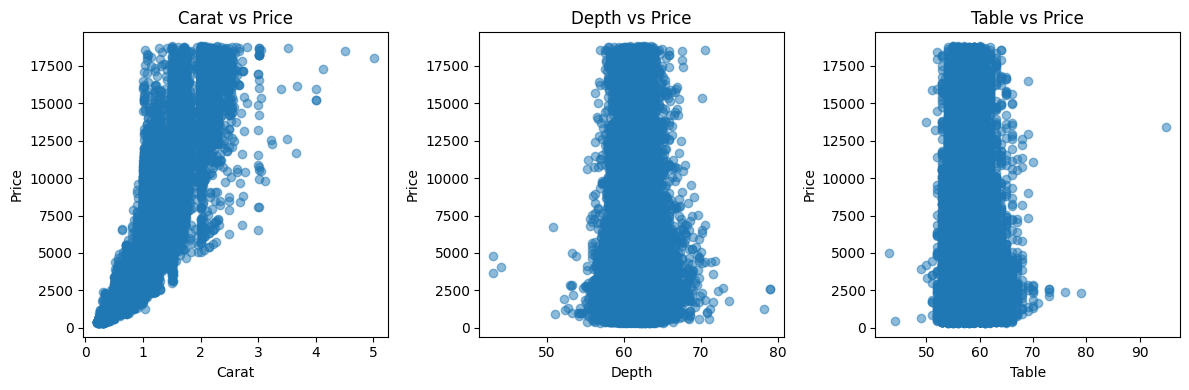

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')

# Select a subset of features for the regression model
# Let's use 'carat', 'depth', and 'table' as predictors, and 'price' as the target
X = diamonds[['carat', 'depth', 'table']]
y = diamonds['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# **1. Check Linearity (Scatter Plots of Predictors vs Target)**

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(X['carat'], y, alpha=0.5)
plt.title('Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price')

plt.subplot(1, 3, 2)
plt.scatter(X['depth'], y, alpha=0.5)
plt.title('Depth vs Price')
plt.xlabel('Depth')
plt.ylabel('Price')

plt.subplot(1, 3, 3)
plt.scatter(X['table'], y, alpha=0.5)
plt.title('Table vs Price')
plt.xlabel('Table')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

# **2. Check Homoscedasticity (Residual Plot)**

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals


In [ ]:
# Ques -4) Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the
# performance of different regression models


In [4]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Generate a synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create a list of models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42)
}

# Step 4: Evaluate each model with a pipeline that includes feature scaling
for model_name, model in models.items():
    # Create a pipeline with scaling and model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Feature scaling
        ('regressor', model)           # Regression model
    ])

    # Step 5: Train the model
    pipeline.fit(X_train, y_train)

    # Step 6: Make predictions
    y_pred = pipeline.predict(X_test)

    # Step 7: Evaluate performance
    mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
    r2 = r2_score(y_test, y_pred)              # R-squared score

    # Print the results for each model
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared Score: {r2}")
    print('-' * 40)


Model: Linear Regression
Mean Squared Error: 0.009511914910419283
R-squared Score: 0.9999994362016347
----------------------------------------
Model: Decision Tree Regressor
Mean Squared Error: 6350.427786748267
R-squared Score: 0.6235920065402036
----------------------------------------
Model: Random Forest Regressor
Mean Squared Error: 2621.793155098221
R-squared Score: 0.8445988311470158
----------------------------------------


In [ ]:
# Ques-5)Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and R-squared score.?



In [5]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Step 1: Load a dataset
# For demonstration, we use a simple dataset with one feature
# You can replace this with your dataset as needed

# Create a simple dataset for demonstration
# Here, 'X' is the feature (independent variable) and 'y' is the target (dependent variable)
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])  # Feature
y = np.array([1, 2, 1.5, 3.5, 5, 6.5, 7, 8.5, 9.5, 10])  # Target

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 5: Evaluate the model and print the coefficients, intercept, and R-squared score
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R-squared score:", r2_score(y_test, y_pred))


Coefficients: [1.10344828]
Intercept: -0.6939655172413808
R-squared score: 0.9891068833399392


In [ ]:
# Ques 6. Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using
 # simple linear regression and visualizes the results.

R-squared score: 0.5449381659234664


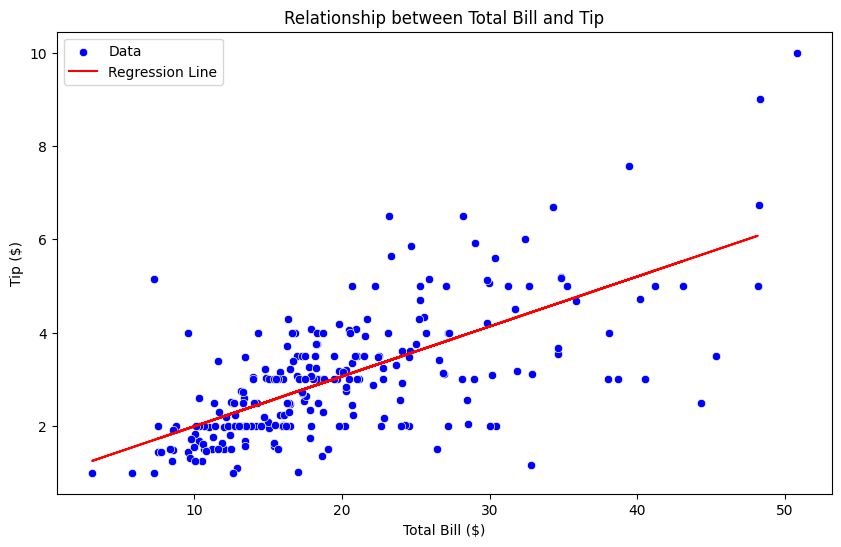

In [6]:
# Importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Step 1: Load the 'tips' dataset from seaborn
tips = sns.load_dataset('tips')

# Step 2: Select the relevant features: 'total_bill' as the independent variable and 'tip' as the dependent variable
X = tips[['total_bill']]  # Feature (independent variable)
y = tips['tip']  # Target (dependent variable)

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model (R-squared score)
print("R-squared score:", r2_score(y_test, y_pred))

# Step 7: Visualize the data and the regression line
plt.figure(figsize=(10, 6))

# Scatter plot of the original data
sns.scatterplot(x='total_bill', y='tip', data=tips, color='blue', label='Data')

# Plot the regression line
plt.plot(X_test, y_pred, color='red', label='Regression Line')

# Adding labels and title
plt.title('Relationship between Total Bill and Tip')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')
plt.legend()

# Show the plot
plt.show()


In [8]:
# Ques-7) Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the
# model to predict new values and plot the data points along with the regression line.

In [9]:
pip install matplotlib scikit-learn


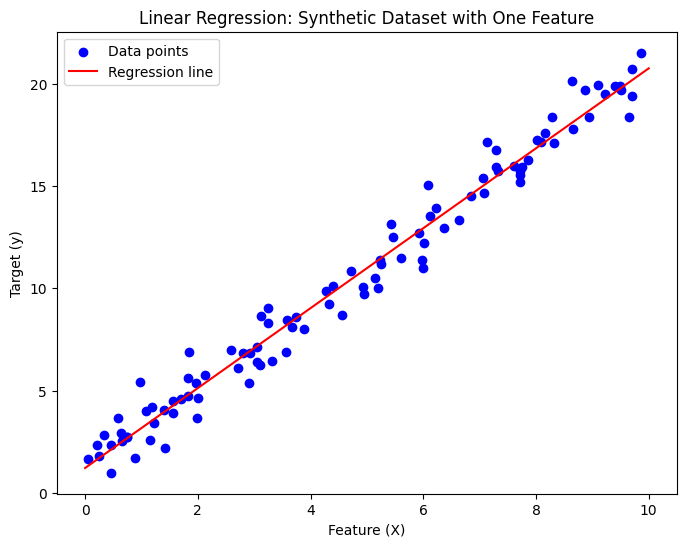

Model coefficients: [[1.95402268]]
Model intercept: [1.21509616]
Prediction for X=0: [1.21509616]
Prediction for X=10: [20.75532293]


In [10]:

# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Create a synthetic dataset
# Let's generate some data with a linear relationship: y = 2 * X + 1 (plus some noise)
np.random.seed(42)  # For reproducibility
X = np.random.rand(100, 1) * 10  # 100 random values between 0 and 10
y = 2 * X + 1 + np.random.randn(100, 1)  # Linear relationship with some noise

# Step 2: Fit a Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Step 3: Make predictions using the model
X_new = np.array([[0], [10]])  # We will predict for two new values, 0 and 10
y_pred = model.predict(X_new)

# Step 4: Plot the data points and the regression line
plt.figure(figsize=(8, 6))

# Scatter plot of the original data
plt.scatter(X, y, color='blue', label='Data points')

# Plot the regression line using the model
plt.plot(X_new, y_pred, color='red', label='Regression line')

# Adding labels and title
plt.title('Linear Regression: Synthetic Dataset with One Feature')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()

# Show the plot
plt.show()

# Step 5: Print the model's coefficients and intercept
print(f"Model coefficients: {model.coef_}")
print(f"Model intercept: {model.intercept_}")

# Predicting for new data
print(f"Prediction for X=0: {model.predict([[0]])[0]}")
print(f"Prediction for X=10: {model.predict([[10]])[0]}")


In [11]:
# Ques -8) Write a Python script that pickles a trained linear regression model and saves it to a file.

# Importing necessary libraries
import numpy as np
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Step 1: Create a synthetic dataset
# Let's generate some data with a linear relationship: y = 2 * X + 1 (plus some noise)
np.random.seed(42)  # For reproducibility
X = np.random.rand(100, 1) * 10  # 100 random values between 0 and 10
y = 2 * X + 1 + np.random.randn(100, 1)  # Linear relationship with some noise

# Step 2: Train a Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Step 3: Save the trained model to a file using pickle
with open('linear_regression_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

print("Model has been pickled and saved to 'linear_regression_model.pkl'.")

# Step 4: To verify, we can load the model back from the file
with open('linear_regression_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Step 5: Make predictions with the loaded model
new_data = np.array([[5], [7]])  # New data for prediction
predictions = loaded_model.predict(new_data)

print("Predictions for new data:", predictions)


Model has been pickled and saved to 'linear_regression_model.pkl'.
Predictions for new data: [[10.98520954]
 [14.8932549 ]]


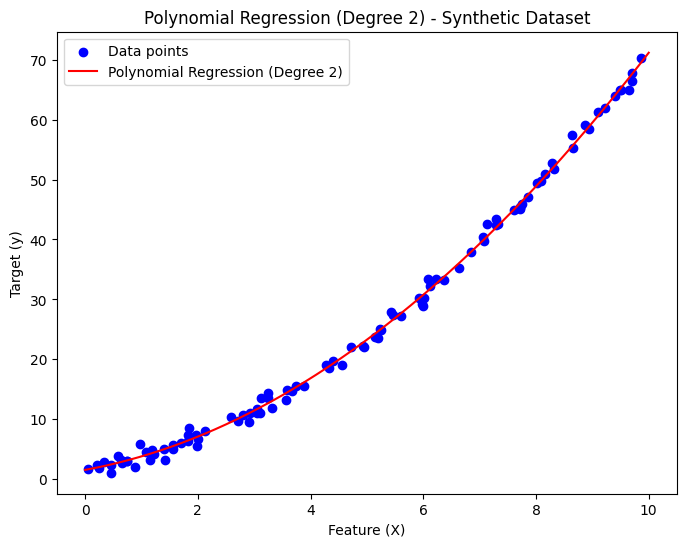

In [12]:
# Ques-9)  Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the regression curve.


# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Step 1: Create a synthetic dataset (with a quadratic relationship)
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 random values between 0 and 10
y = 0.5 * X**2 + 2 * X + 1 + np.random.randn(100, 1)  # Quadratic relationship with noise

# Step 2: Transform the features to include polynomial terms (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Step 3: Fit a linear regression model to the transformed features
model = LinearRegression()
model.fit(X_poly, y)

# Step 4: Predict values using the trained polynomial regression model
X_range = np.linspace(0, 10, 1000).reshape(-1, 1)  # Generate a range of values for smooth plotting
X_range_poly = poly.transform(X_range)  # Transform these values to the polynomial features
y_range = model.predict(X_range_poly)

# Step 5: Plot the original data and the polynomial regression curve
plt.figure(figsize=(8, 6))

# Scatter plot of the original data points
plt.scatter(X, y, color='blue', label='Data points')

# Plot the polynomial regression curve
plt.plot(X_range, y_range, color='red', label='Polynomial Regression (Degree 2)')

# Adding labels and title
plt.title('Polynomial Regression (Degree 2) - Synthetic Dataset')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()

# Show the plot
plt.show()


In [ ]:
# Ques 10) . Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear regression model to the data.
# Print the model's coefficient and intercept.




In [13]:
# Importing necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression

# Step 1: Generate synthetic data for simple linear regression
np.random.seed(42)  # For reproducibility
X = np.random.rand(100, 1) * 10  # 100 random values for feature X between 0 and 10
y = 3 * X + 5 + np.random.randn(100, 1)  # y = 3*X + 5 (with some noise added)

# Step 2: Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Step 3: Print the model's coefficient (slope) and intercept
print(f"Model Coefficient (Slope): {model.coef_[0][0]}")
print(f"Model Intercept: {model.intercept_[0]}")


Model Coefficient (Slope): 2.954022677287696
Model Intercept: 5.215096157546753


In [ ]:
# Ques 11) . Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and compares their performance


In [14]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Step 1: Create a synthetic dataset (with a quadratic relationship)
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 random values between 0 and 10
y = 0.5 * X**2 + 2 * X + 1 + np.random.randn(100, 1)  # Quadratic relationship with noise

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize the Linear Regression model
linear_model = LinearRegression()

# List of degrees for polynomial regression models
degrees = [1, 2, 3]

# Step 4: Train and evaluate polynomial regression models of different degrees
plt.figure(figsize=(10, 6))

for degree in degrees:
    # Create polynomial features for the current degree
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Train the model on the polynomial features
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_poly)

    # Calculate R-squared score
    r2 = r2_score(y_test, y_pred)

    # Print the R-squared score for each degree
    print(f"Degree {degree} Polynomial Regression - R-squared: {r2:.4f}")

    # Plot the regression cu


Degree 1 Polynomial Regression - R-squared: 0.9708
Degree 2 Polynomial Regression - R-squared: 0.9986
Degree 3 Polynomial Regression - R-squared: 0.9986


<Figure size 1000x600 with 0 Axes>

In [18]:
pip install scikit-learn


In [ ]:
# Ques 12)  Write a Python script that fits a simple linear regression model with two features and
# prints the model's # coefficients, intercept, and R-squared score.


In [15]:
# Importing necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Step 1: Generate synthetic data with two features
np.random.seed(42)  # For reproducibility

# Generate 100 random samples for two features (X1 and X2)
X = np.random.rand(100, 2) * 10  # 100 random values for 2 features, between 0 and 10

# Create a target variable y, with a linear relationship with X1 and X2
# Let's assume y = 3*X1 + 2*X2 + 5 (plus some noise)
y = 3 * X[:, 0] + 2 * X[:, 1] + 5 + np.random.randn(100)  # Adding noise

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions using the model
y_pred = model.predict(X_test)

# Step 5: Print the model's coefficients, intercept, and R-squared score
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")
print(f"R-squared score: {r2_score(y_test, y_pred)}")



Model Coefficients: [3.02545136 2.04741599]
Model Intercept: 4.716671499389687
R-squared score: 0.9896640114137464


In [17]:
pip install scikit-learn matplotlib


In [ ]:
# Ques 13) Write a Python script that generates synthetic data, fits a linear regression model, and
#  visualizes the regression line along with the data points.



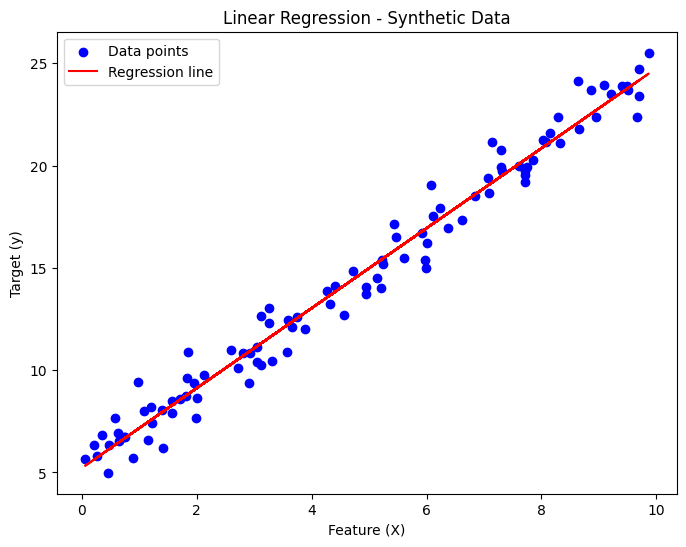

Model Coefficient: 1.9540226772876963
Model Intercept: 5.21509615754675


In [19]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Generate synthetic data
np.random.seed(42)  # For reproducibility
X = np.random.rand(100, 1) * 10  # 100 random values between 0 and 10 for the feature
y = 2 * X + 5 + np.random.randn(100, 1)  # Linear relationship: y = 2*X + 5 + noise

# Step 2: Fit a Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Step 3: Predict values using the trained model
y_pred = model.predict(X)

# Step 4: Plot the data points and the regression line
plt.figure(figsize=(8, 6))

# Scatter plot of the original data points
plt.scatter(X, y, color='blue', label='Data points')

# Plot the regression line
plt.plot(X, y_pred, color='red', label='Regression line')

# Adding labels and title
plt.title('Linear Regression - Synthetic Data')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()

# Show the plot
plt.show()

# Step 5: Print the model's coefficient and intercept
print(f"Model Coefficient: {model.coef_[0][0]}")
print(f"Model Intercept: {model.intercept_[0]}")


In [20]:
pip install pandas statsmodels numpy


In [ ]:
# Ques 14) Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset with multiple features.



In [21]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Step 1: Generate or load a dataset
# For demonstration, let's create a synthetic dataset
np.random.seed(42)

# Generating a synthetic dataset with 3 features
X1 = np.random.rand(100) * 10
X2 = 2 * X1 + np.random.rand(100) * 2  # X2 is highly correlated with X1
X3 = np.random.rand(100) * 10  # X3 is somewhat independent

# Creating a DataFrame
data = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3})

# Step 2: Add a constant to the features for VIF calculation
# This represents the intercept term in the regression
data_with_const = add_constant(data)

# Step 3: Calculate the VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = data_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(data_with_const.values, i)
                   for i in range(data_with_const.shape[1])]

# Step 4: Display the VIF values
print(vif_data)


  Feature         VIF
0   const   11.112919
1      X1  105.613385
2      X2  105.749546
3      X3    1.023792


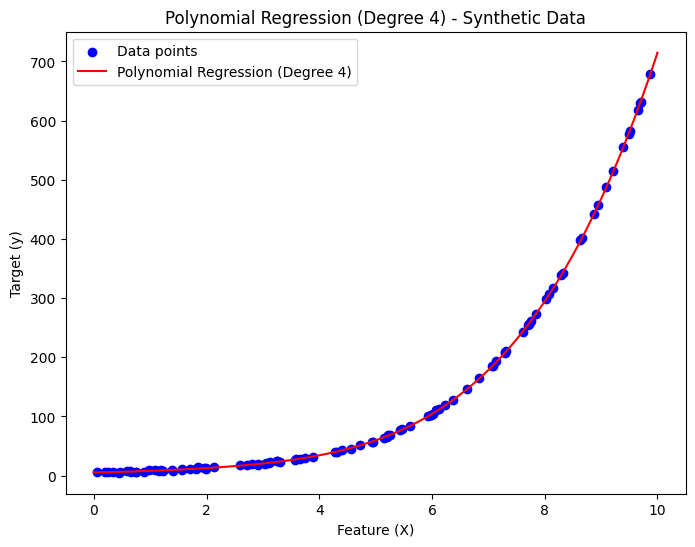

Model Coefficients: [[ 0.          1.08616078  1.81660021 -0.46265785  0.09793489]]
Model Intercept: [5.44512422]


In [22]:
# Ques 15) Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a olynomial regression model, and plots the regression curve.

# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Step 1: Generate synthetic data with a polynomial relationship (degree 4)
np.random.seed(42)  # For reproducibility
X = np.random.rand(100, 1) * 10  # 100 random values for the feature X (between 0 and 10)
y = 0.1 * X**4 - 0.5 * X**3 + 2 * X**2 + X + 5 + np.random.randn(100, 1)  # Polynomial of degree 4 with noise

# Step 2: Transform the feature into polynomial features (degree 4)
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)  # Transform the feature X into degree 4 polynomial features

# Step 3: Fit a Linear Regression model to the polynomial features
model = LinearRegression()
model.fit(X_poly, y)

# Step 4: Predict values using the trained model
X_range = np.linspace(0, 10, 1000).reshape(-1, 1)  # Generate a smooth range of values for X
X_range_poly = poly.transform(X_range)  # Transform these values into polynomial features
y_range = model.predict(X_range_poly)  # Predict corresponding y values

# Step 5: Plot the original data points and the polynomial regression curve
plt.figure(figsize=(8, 6))

# Scatter plot of the original data points
plt.scatter(X, y, color='blue', label='Data points')

# Plot the polynomial regression curve
plt.plot(X_range, y_range, color='red', label='Polynomial Regression (Degree 4)')

# Adding labels and title
plt.title('Polynomial Regression (Degree 4) - Synthetic Data')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()

# Show the plot
plt.show()

# Step 6: Print the model's coefficients and intercept
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")



In [ ]:
# Ques 16) Write a Python script that creates a machine learning pipeline with data standardization and a multiple
# linear regression model, and prints the R-squared score.



In [23]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

# Step 1: Generate synthetic data (Multiple features)
np.random.seed(42)  # For reproducibility

# Create 100 samples, 3 features (X1, X2, X3)
X = np.random.rand(100, 3) * 10  # Random values between 0 and 10 for 3 features
y = 2 * X[:, 0] + 3 * X[:, 1] - 4 * X[:, 2] + 5 + np.random.randn(100)  # Linear combination with noise

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create a pipeline with StandardScaler and LinearRegression
pipeline = make_pipeline(StandardScaler(), LinearRegression())

# Step 4: Fit the model on the training data
pipeline.fit(X_train, y_train)

# Step 5: Predict the target values using the test set
y_pred = pipeline.predict(X_test)

# Step 6: Calculate and print the R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.4f}")


R-squared score: 0.9907


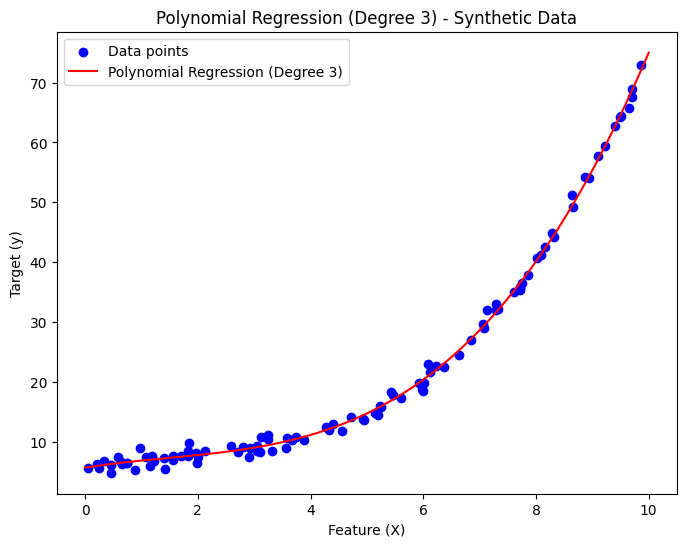

Model Coefficients: [[ 0.          1.51258599 -0.42212844  0.0963216 ]]
Model Intercept: [5.73445991]


In [24]:
# Ques 17) Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the regression curve.

# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Step 1: Generate synthetic data (Polynomial relationship of degree 3)
np.random.seed(42)  # For reproducibility
X = np.random.rand(100, 1) * 10  # 100 random values between 0 and 10 for feature X
y = 0.1 * X**3 - 0.5 * X**2 + 2 * X + 5 + np.random.randn(100, 1)  # Polynomial of degree 3 with noise

# Step 2: Transform the feature into polynomial features (degree 3)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)  # Transform the feature X into degree 3 polynomial features

# Step 3: Fit a Linear Regression model to the polynomial features
model = LinearRegression()
model.fit(X_poly, y)

# Step 4: Predict values using the trained model
X_range = np.linspace(0, 10, 1000).reshape(-1, 1)  # Generate a smooth range of X values
X_range_poly = poly.transform(X_range)  # Transform these values into polynomial features
y_range = model.predict(X_range_poly)  # Predict corresponding y values

# Step 5: Plot the original data points and the polynomial regression curve
plt.figure(figsize=(8, 6))

# Scatter plot of the original data points
plt.scatter(X, y, color='blue', label='Data points')

# Plot the polynomial regression curve
plt.plot(X_range, y_range, color='red', label='Polynomial Regression (Degree 3)')

# Adding labels and title
plt.title('Polynomial Regression (Degree 3) - Synthetic Data')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()

# Show the plot
plt.show()

# Step 6: Print the model's coefficients and intercept
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")



In [25]:
# Ques 18) Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features.
# Print the R-squared score and model coefficients.

# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Step 1: Generate synthetic data with 5 features
np.random.seed(42)  # For reproducibility

# Create 100 samples and 5 features (X1, X2, X3, X4, X5)
X = np.random.rand(100, 5) * 10  # Random values between 0 and 10 for 5 features
# Target variable y is a linear combination of X plus some noise
y = 3 * X[:, 0] + 2 * X[:, 1] - 1.5 * X[:, 2] + 0.5 * X[:, 3] - 2 * X[:, 4] + 10 + np.random.randn(100)  # Adding noise

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Fit a multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Predict the target values using the test set
y_pred = model.predict(X_test)

# Step 5: Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.4f}")

# Step 6: Print the model's coefficients and intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


R-squared score: 0.9924
Model Coefficients: [ 2.96529587  1.97660767 -1.43520967  0.51455846 -2.04456402]
Model Intercept: 10.145984743986991


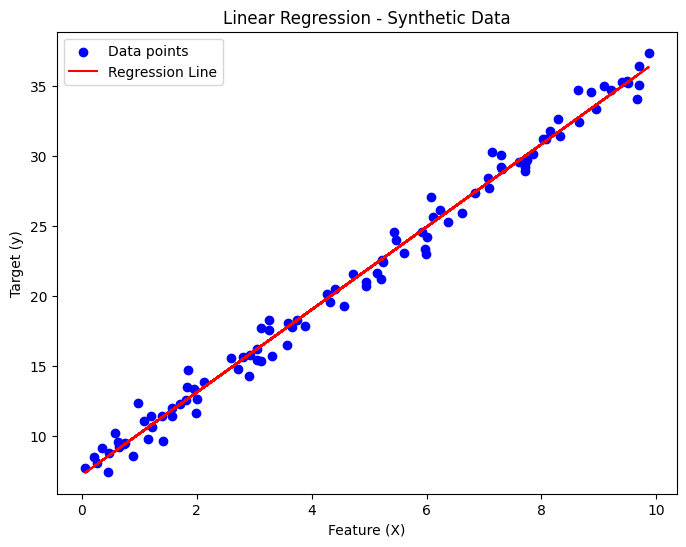

Model Coefficient: [2.95402268]
Model Intercept: [7.21509616]


In [26]:
# Ques 19) Write a Python script that generates synthetic data for linear regression, fits a model, and
# visualizes the data points along with the regression line.

# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Generate synthetic data for linear regression
np.random.seed(42)  # For reproducibility
X = np.random.rand(100, 1) * 10  # Random values between 0 and 10 for feature X
y = 3 * X + 7 + np.random.randn(100, 1)  # Linear relationship with some noise (y = 3X + 7 + noise)

# Step 2: Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Step 3: Predict values using the trained model
y_pred = model.predict(X)

# Step 4: Plot the data points and the regression line
plt.figure(figsize=(8, 6))

# Scatter plot of the data points
plt.scatter(X, y, color='blue', label='Data points')

# Plot the regression line
plt.plot(X, y_pred, color='red', label='Regression Line')

# Adding labels and title
plt.title('Linear Regression - Synthetic Data')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()

# Show the plot
plt.show()

# Step 5: Print the model's coefficients and intercept
print(f"Model Coefficient: {model.coef_[0]}")
print(f"Model Intercept: {model.intercept_}")


In [27]:
# Qures 20) Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's Rsquared score and coefficients.

# Importing necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Step 1: Generate synthetic data with 3 features
np.random.seed(42)  # For reproducibility

# Create 100 samples and 3 features (X1, X2, X3)
X = np.random.rand(100, 3) * 10  # Random values between 0 and 10 for 3 features
# Target variable y is a linear combination of X plus some noise
y = 2 * X[:, 0] + 3 * X[:, 1] - 4 * X[:, 2] + 5 + np.random.randn(100)  # Adding noise

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Fit a multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Predict the target values using the test set
y_pred = model.predict(X_test)

# Step 5: Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.4f}")

# Step 6: Print the model's coefficients and intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


R-squared score: 0.9907
Model Coefficients: [ 2.01058977  2.9924606  -3.93139408]
Model Intercept: 4.914989558367065


In [28]:
# Ques 21)  Write a Python script that demonstrates how to serialize and deserialize machine learning models using joblib instead of pickling.

# Importing necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import joblib

# Step 1: Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Random values for feature X
y = 3 * X + 7 + np.random.randn(100, 1)  # Linear relationship with some noise

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Serialize (save) the model using joblib
joblib.dump(model, 'linear_regression_model.joblib')
print("Model saved successfully.")

# Step 5: Deserialize (load) the model using joblib
loaded_model = joblib.load('linear_regression_model.joblib')
print("Model loaded successfully.")

# Step 6: Make predictions with the loaded model
y_pred = loaded_model.predict(X_test)

# Step 7: Print the predictions for the test set
print("Predictions for the test set:")
print(y_pred[:5])  # Print the first 5 predictions

# Step 8: Print model coefficients and intercept from the loaded model
print(f"Model Coefficients: {loaded_model.coef_}")
print(f"Model Intercept: {loaded_model.intercept_}")



Model saved successfully.
Model loaded successfully.
Predictions for the test set:
[[ 9.02415451]
 [33.62859247]
 [30.00031389]
 [26.75267675]
 [14.80245073]]
Model Coefficients: [[2.95986473]]
Model Intercept: [7.14291332]


In [29]:
# Ques 22)  Write a Python script to perform linear regression with categorical features using one-hot encoding. Use the Seaborn 'tips' dataset.

# Importing necessary libraries
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Step 1: Load the 'tips' dataset
tips = sns.load_dataset('tips')

# Step 2: One-hot encoding of categorical features
# One-hot encode the 'sex', 'smoker', 'day', 'time' columns
tips_encoded = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

# Step 3: Define the feature variables (X) and target variable (y)
X = tips_encoded.drop('tip', axis=1)  # All columns except 'tip'
y = tips_encoded['tip']  # The target variable is 'tip'

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 7: Print the R-squared score of the model
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.4f}")

# Step 8: Print the model's coefficients and intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)



R-squared score: 0.4373
Model Coefficients: [ 0.09469974  0.23348393 -0.02881928  0.19235325  0.17972098 -0.00606432
  0.12892759 -0.09495716]
Model Intercept: 0.4791179104407939


In [30]:
# Ques 23) Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and Rsquared score.

# Importing necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Step 1: Generate a synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 5) * 10  # Random features (100 samples, 5 features)
y = 2 * X[:, 0] - 3 * X[:, 1] + 4 * X[:, 2] + 5 * X[:, 3] - 6 * X[:, 4] + np.random.randn(100)  # Linear relationship with noise

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Step 4: Train a Ridge Regression model with alpha = 1 (regularization strength)
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train, y_train)

# Step 5: Make predictions on the test set using both models
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)

# Step 6: Calculate and print R-squared score for both models
r2_linear = r2_score(y_test, y_pred_linear)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Linear Regression R-squared score: {r2_linear:.4f}")
print(f"Ridge Regression R-squared score: {r2_ridge:.4f}")

# Step 7: Print the coefficients of both models
print("\nLinear Regression Coefficients:")
print(linear_model.coef_)

print("\nRidge Regression Coefficients:")
print(ridge_model.coef_)


Linear Regression R-squared score: 0.9976
Ridge Regression R-squared score: 0.9976

Linear Regression Coefficients:
[ 1.96529587 -3.02339233  4.06479033  5.01455846 -6.04456402]

Ridge Regression Coefficients:
[ 1.96368592 -3.01893152  4.05638083  5.00395245 -6.03463805]


In [31]:
# Ques 24)  Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic dataset.


# Importing necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression

# Step 1: Generate a synthetic dataset
X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)

# Step 2: Initialize the Linear Regression model
model = LinearRegression()

# Step 3: Perform cross-validation
# We will use R-squared score as the evaluation metric (default scoring for regression)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Step 4: Print the cross-validation scores for each fold
print("Cross-validation scores (R-squared) for each fold:", cv_scores)

# Step 5: Print the mean R-squared score across all folds
print(f"Mean R-squared score: {cv_scores.mean():.4f}")




Cross-validation scores (R-squared) for each fold: [0.99999931 0.99999901 0.99999977 0.99999917 0.99999934]
Mean R-squared score: 1.0000


R-squared score for degree 1: 0.8422


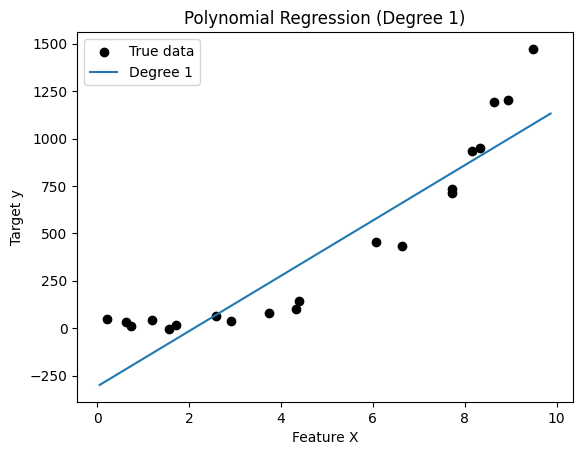

R-squared score for degree 2: 0.9875


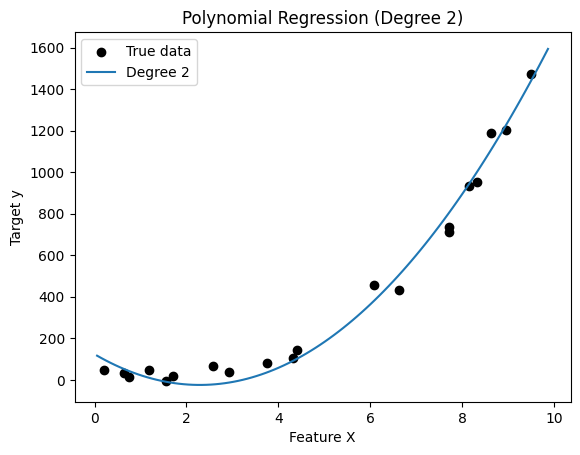

R-squared score for degree 3: 0.9929


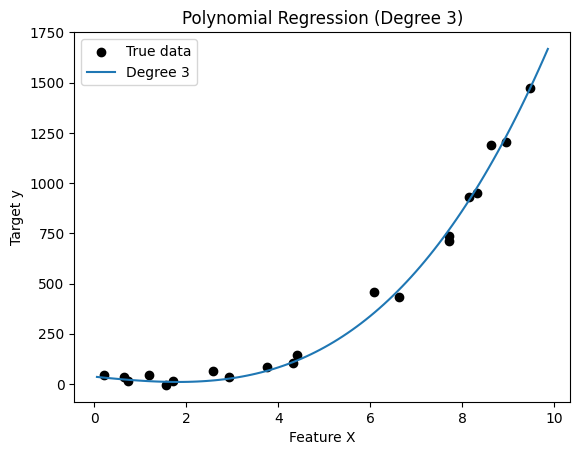

R-squared score for degree 4: 0.9924


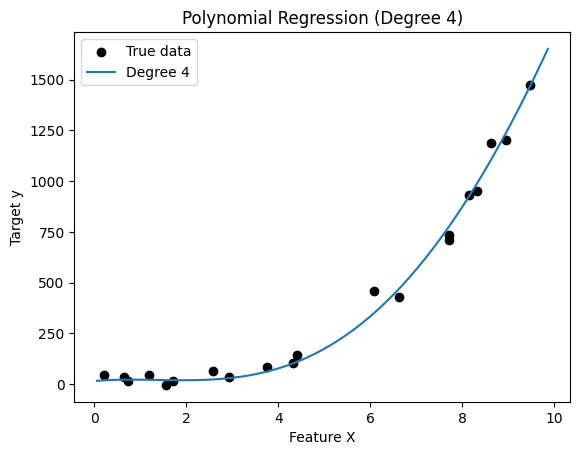

In [32]:
# Ques -25) Write a Python script that compares polynomial regression models of different degrees and prints the Rsquared score for each.

# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Step 1: Generate synthetic data (polynomial relationship with noise)
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Random feature (100 samples)
y = 2 * X**3 - 3 * X**2 + 4 * X + np.random.randn(100, 1) * 50  # Polynomial relationship with noise

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to fit polynomial regression models and print R-squared scores
def evaluate_polynomial_models(degrees, X_train, X_test, y_train, y_test):
    for degree in degrees:
        # Step 3: Transform the features to polynomial features of a given degree
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        # Step 4: Train a linear regression model on the polynomial features
        model = LinearRegression()
        model.fit(X_train_poly, y_train)

        # Step 5: Make predictions
        y_pred = model.predict(X_test_poly)

        # Step 6: Calculate the R-squared score for the current model
        r2 = r2_score(y_test, y_pred)
        print(f"R-squared score for degree {degree}: {r2:.4f}")

        # Plot the polynomial regression curve for visualization (optional)
        plt.scatter(X_test, y_test, color='black', label='True data')
        X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        X_range_poly = poly.transform(X_range)
        y_range_pred = model.predict(X_range_poly)
        plt.plot(X_range, y_range_pred, label=f'Degree {degree}')
        plt.xlabel('Feature X')
        plt.ylabel('Target y')
        plt.title(f"Polynomial Regression (Degree {degree})")
        plt.legend()
        plt.show()

# Step 7: Define degrees to evaluate and call the evaluation function
degrees = [1, 2, 3, 4]  # Degrees to test
evaluate_polynomial_models(degrees, X_train, X_test, y_train, y_test)
